In [65]:
# detecting and removing outliers using the 5 number summary and z score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

20.633333333333333

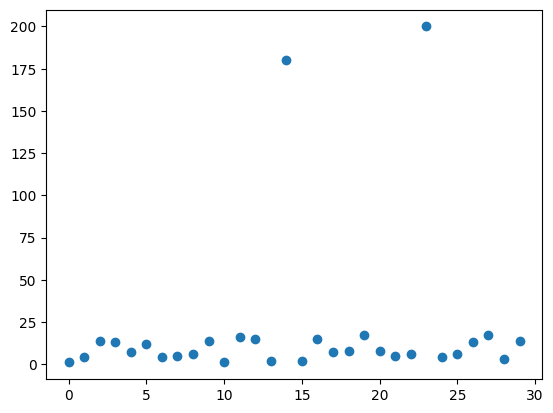

In [43]:
# logic to get random numbers to fill a data set
# import random
# for i in range(30):
#     print(random.randint(1,20),end=',')

data = [1,4,14,13,7,12,4,5,6,14,1,16,15,2,180,2,15,7,8,17,8,5,6,200,4,6,13,17,3,14]

plt.scatter([i for i in range(len(data))],data)
np.mean(data)

In [54]:
outliers: list = []

def outlier_detection(data):
    '''
    Outlier detection by calculating the z score of a number
    '''
    
    threshold =  3   # defining threshold: 3rd standard dev away from mean
    mean = np.mean(data)
    std_dev = np.std(data)

    for i in data:
        z_score = (i - mean)/std_dev # z score formula
        if np.abs(z_score) > threshold:
            print(z_score)
            outliers.append(i)
    return outliers

In [55]:
outlier_detection(data)

3.4934226386154528
3.931835854086959


[180, 200]

Q1,Q2 =  4.25 14.0
IQR =  9.75
lower fence =  -10.375
upper fence =  28.625
**outliers =  [180, 200]


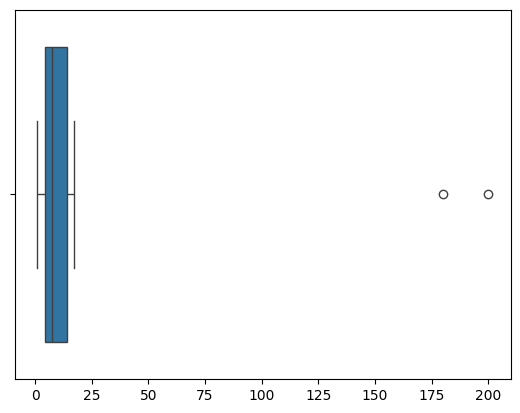

In [80]:
'''
Using the IQR --> fencing bounds for outlier detection
Steps:
1) sort data
2) calc Q1 and Q3
3) IQR = Q3-Q1
4) Lower Fence = Q1 - 1.5(IQR)
5) Upper Fence = Q3 + 1.5(IQR)
6) Boundary definition and checks
'''
# sorting data
data1 = sorted(data)
# calculating quartiles 
q1,q3 = np.percentile(data1,[25,75])
print('Q1,Q2 = ',q1,q3)
# calculating inter quartile range
iqr= q3-q1
print('IQR = ',iqr)
# calculating lower and upper fence
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print('lower fence = ', lower_fence)
print('upper fence = ', upper_fence)

sns.boxplot(data1,orient='h')
outliers_iqr = []
def outlier_removal_iqr(data1):
    for i in data1:
        if i < lower_fence or i > upper_fence and i not in outliers_iqr:
            outliers_iqr.append(i)
    return outliers_iqr
    
print('**outliers = ', outlier_removal_iqr(data1))            

[180, 200]
[1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 12, 13, 13, 14, 14, 14, 15, 15, 16, 17, 17]


<Axes: >

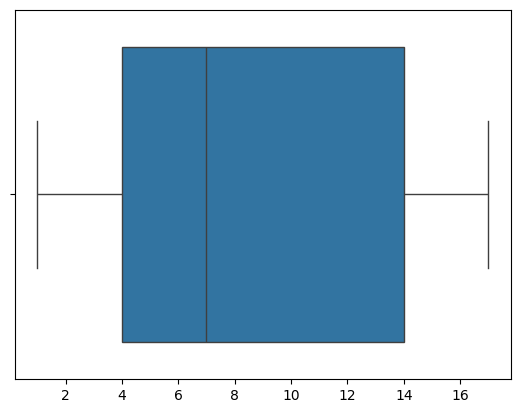

In [86]:
# creating clean data from pre-exisisting data with outliers

outliers_list = outlier_removal_iqr(data1)
print(outliers_list)
iqr_cleaned_data = []

for i in data1:
    if i not in outliers_list:
        iqr_cleaned_data.append(i)
    else:
        continue
print(iqr_cleaned_data)
sns.boxplot(iqr_cleaned_data, orient='h') # much cleaner boxplot with not outliers in datas